<a href="https://colab.research.google.com/github/KhaiChutherock/Hybrid-Neural-Network-and-Simulated-Annealing-Algorithm-for-Optimizing-Wideband-Patch-Antenna/blob/main/Prj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow pandas scikit-learn

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ANN/Dataset.csv', header=None)

In [ ]:
# Lấy dữ liệu đầu vào và đầu ra
X = df.iloc[:, :4].values
Y = df.iloc[:, 4:].values

In [ ]:
# Chuẩn hóa dữ liệu
X_array = np.array([[1, 0.5, 1, 18.2],[18, 8, 10 ,23.4]])
X_scaled = (X - X_array[0, :]) / (X_array[1, :] - X_array[0, :])

In [ ]:
# Chia dữ liệu thành tập train và test
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng mô hình ANN
model = Sequential()
model.add(Dense(400, input_dim=4, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(41, activation='sigmoid'))

In [ ]:
# Hàm r2
def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
# Biên dịch mô hình
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[r2_score])

In [ ]:
# Huấn luyện mô hình
history = model.fit(X_train, Y_train, epochs= 600, validation_data=(X_test, Y_test), batch_size = 96)

Epoch 1/600
10/10 [==============================] - 2s 37ms/step - loss: 0.0274 - r2_score: 0.0331 - val_loss: 0.0214 - val_r2_score: 0.2591
Epoch 2/600
10/10 [==============================] - 0s 12ms/step - loss: 0.0172 - r2_score: 0.3937 - val_loss: 0.0144 - val_r2_score: 0.4951
Epoch 3/600
10/10 [==============================] - 0s 14ms/step - loss: 0.0127 - r2_score: 0.5528 - val_loss: 0.0107 - val_r2_score: 0.6195
Epoch 4/600
10/10 [==============================] - 0s 14ms/step - loss: 0.0091 - r2_score: 0.6778 - val_loss: 0.0078 - val_r2_score: 0.7240
Epoch 5/600
10/10 [==============================] - 0s 20ms/step - loss: 0.0069 - r2_score: 0.7552 - val_loss: 0.0064 - val_r2_score: 0.7741
Epoch 6/600
10/10 [==============================] - 0s 26ms/step - loss: 0.0060 - r2_score: 0.7906 - val_loss: 0.0057 - val_r2_score: 0.7988
Epoch 7/600
10/10 [==============================] - 0s 28ms/step - loss: 0.0054 - r2_score: 0.8105 - val_loss: 0.0051 - val_r2_score: 0.8171
Epoch 

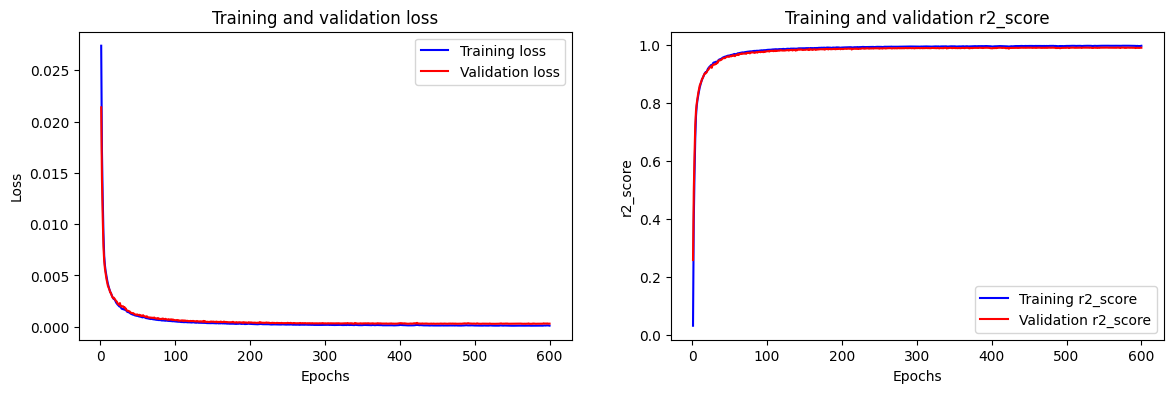

In [ ]:
# Plotting training and validation loss and r2_score
loss = history.history['loss']
val_loss = history.history['val_loss']
r2_score = history.history['r2_score']
val_r2_score = history.history['val_r2_score']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation r2_score
plt.subplot(1, 2, 2)
plt.plot(epochs, r2_score, 'b', label='Training r2_score')
plt.plot(epochs, val_r2_score, 'r', label='Validation r2_score')
plt.title('Training and validation r2_score')
plt.xlabel('Epochs')
plt.ylabel('r2_score')
plt.legend()

plt.show()

In [ ]:
#giá trị loss và r2
print("Validation set:")
print("- loss:", history.history["loss"][-1])
print("- r2_score:", history.history["r2_score"][-1])

print("\nTrain set:")
print("- loss:", history.history["val_loss"][-1])
print("- r2_score:", history.history["val_r2_score"][-1])

Test set:
- loss: 0.00010097791528096423
- r2_score: 0.9964499473571777

Train set:
- loss: 0.0002960162819363177
- r2_score: 0.9897316098213196


In [ ]:
# Hàm chuẩn hóa input
def normalize_input(X, X_array):
    X_scaled = (X - X_array[0, :]) / (X_array[1, :] - X_array[0, :])
    return X_scaled

In [ ]:
# Hàm tính băng thông
def calculate_bw(model, antenna_dimensions):
    antenna_dimensions_scaled = normalize_input(antenna_dimensions, X_array)
    s11_values = model.predict(np.array([antenna_dimensions_scaled]))[0]
    frequencies = np.linspace(8, 12, num=41)
    f1 = None
    f2 = None
    current_start = None
    bw_max = 0
    for i in range(len(s11_values) - 1):
      if s11_values[i] <= 0.32:
          if current_start is None:
              current_start = i
      else:
          if current_start is not None:
              bw = frequencies[i - 1] - frequencies[current_start]

              if f1 is None or bw > bw_max :
                  f1 = frequencies[current_start]
                  f2 = frequencies[i - 1]
                  bw_max = bw
              current_start = None

    if current_start is not None:
       bw = frequencies[-1] - frequencies[current_start]

       if f1 is None or bw > bw_max:
          f1 = frequencies[current_start]
          f2 = frequencies[-1]

    if f1 is None or f2 is None:
        f1 = f2 = 8
    return f1, f2

In [ ]:
def cost_function(antenna_dimensions, model):
    omega = 0.2
    f1, f2 = calculate_bw(model, antenna_dimensions)
    bw_cost = f1 / f2
    bw_cost_scaled = (bw_cost - 8 / 12) / (1 - 8 / 12)
    f0_cost = abs(((f1 + f2) / 2) - 10)
    f0_cost_scaled = f0_cost / 2
    cost = omega * bw_cost_scaled + (1 - omega) * f0_cost_scaled
    return cost

In [ ]:
# SA
def simulated_annealing(model, initial_temperature, cooling_rate, iterations):

    def generate_solution(current_solution=None):
        if current_solution is None:
            return [
                np.random.uniform(1, 18),
                np.random.uniform(0.5, 8),
                np.random.uniform(1, 10),
                np.random.choice([18.2, 23.4, 20.8])
            ]
        else:
            new_solution = current_solution[:]
            param_to_change = random.randint(0, 2)

            if param_to_change == 0:
                new_solution[0] = np.random.uniform(1, 18)
            elif param_to_change == 1:
                new_solution[1] = np.random.uniform(0.5, 8)
            elif param_to_change == 2:
                new_solution[2] = np.random.uniform(1, 10)
            else:
                new_solution[3] = np.random.choice([18.2, 23.4, 20.8])

            return new_solution

    def acceptance_probability(delta_cost, temperature):
        return np.exp(-delta_cost / temperature)

    current_solution = generate_solution()
    current_cost = cost_function(current_solution, model)
    best_solution = current_solution
    best_cost = current_cost
    temperature = initial_temperature

    history = {'iteration': [], 'current_cost': [], 'best_cost': [], 'temperature': []}
    for i in range(iterations):
        new_solution = generate_solution()
        new_cost = cost_function(new_solution, model)

        delta_cost = new_cost - current_cost
        if new_cost < current_cost or random.random() < acceptance_probability(delta_cost, temperature):
            current_solution = new_solution
            current_cost = new_cost
            print(current_cost)
            if new_cost < best_cost:
                best_solution = new_solution
                best_cost = new_cost

        temperature *= cooling_rate

        history['iteration'].append(i)
        history['current_cost'].append(current_cost)
        history['best_cost'].append(best_cost)
        history['temperature'].append(temperature)
    return best_solution, best_cost, history

initial_temperature = 1
cooling_rate = 0.9977
iterations = 2000

# Chạy thuật toán SA
best_solution, best_cost, history = simulated_annealing(model, initial_temperature, cooling_rate, iterations)

1/1 [==============================] - 0s 21ms/step
0.22174757281553376
1/1 [==============================] - 0s 21ms/step
0.6538461538461539
1/1 [==============================] - 0s 23ms/step
0.21882352941176486
1/1 [==============================] - 0s 21ms/step
0.193398058252427
1/1 [==============================] - 0s 22ms/step
0.22174757281553376
1/1 [==============================] - 0s 21ms/step
0.46216216216216227
1/1 [==============================] - 0s 23ms/step
0.449090909090909
1/1 [==============================] - 0s 21ms/step
0.6538461538461539
1/1 [==============================] - 0s 22ms/step
0.2569230769230766
1/1 [==============================] - 0s 22ms/step
0.6672527472527476
1/1 [==============================] - 0s 21ms/step
0.6538461538461539
1/1 [==============================] - 0s 25ms/step
0.5748387096774196
1/1 [==============================] - 0s 24ms/step
0.21076923076923043
1/1 [==============================] - 0s 21ms/step
0.5030769230769228
1/1

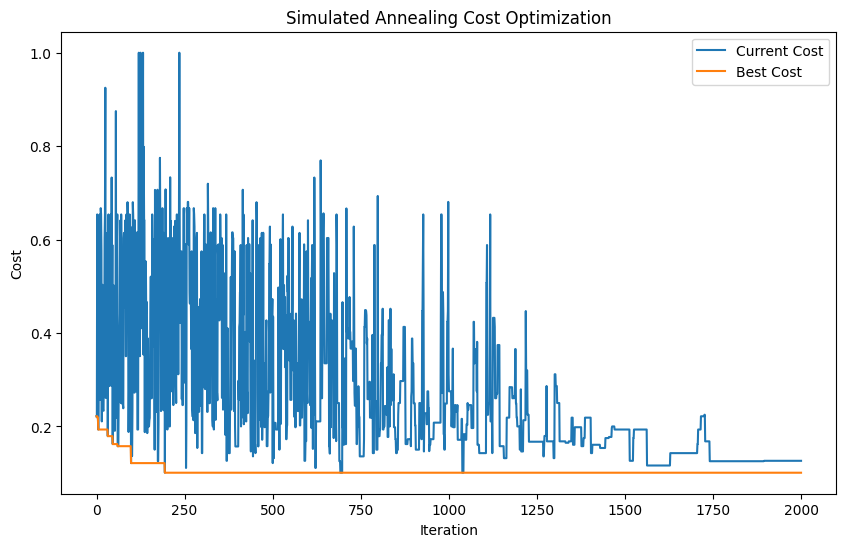

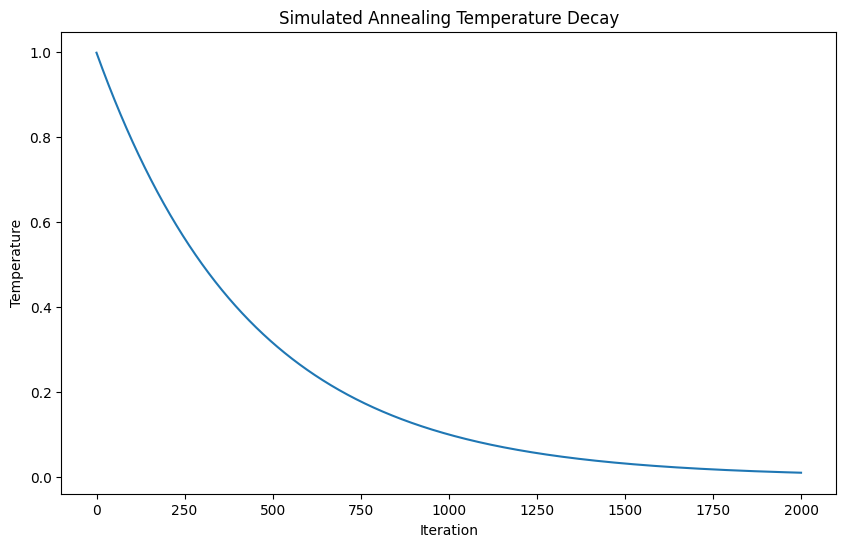

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history['iteration'], history['current_cost'], label='Current Cost')
plt.plot(history['iteration'], history['best_cost'], label='Best Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.title('Simulated Annealing Cost Optimization')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history['iteration'], history['temperature'], label='Temperature')
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Simulated Annealing Temperature Decay')
plt.show()

In [ ]:
print("Best parameters found:", best_solution)
print("Best cost achieved:", best_cost)
f1, f2 = calculate_bw(model,best_solution)
print("f1 =",f1)
print("f2 =",f2)

Best parameters found: [15.920833859962134, 4.73747650801743, 9.254213829117429, 18.2]
Best cost achieved: 0.10091743119266056
1/1 [==============================] - 0s 30ms/step
f1 = 9.1
f2 = 10.9


In [ ]:
best_solution = [15.92, 4.74, 9.25,18.2]
best_params_normalized = normalize_input([best_solution], X_array)
s11_values_best = model.predict(best_params_normalized)[0]
print(s11_values_best)

1/1 [==============================] - 0s 22ms/step
[0.64248955 0.66796863 0.6864573  0.6893065  0.7196653  0.72902834
 0.75248265 0.74174434 0.724687   0.6740231  0.5231242  0.30478173
 0.12804544 0.06789161 0.05408057 0.07369568 0.09572856 0.12388739
 0.1442561  0.15283088 0.15169755 0.13752931 0.11784963 0.11222844
 0.09657874 0.09814101 0.1097956  0.14770804 0.21431254 0.27931267
 0.33862016 0.41334447 0.46800086 0.51832205 0.5501619  0.5876434
 0.59603715 0.58218443 0.57078886 0.54869187 0.51764655]


1/1 [==============================] - 0s 34ms/step


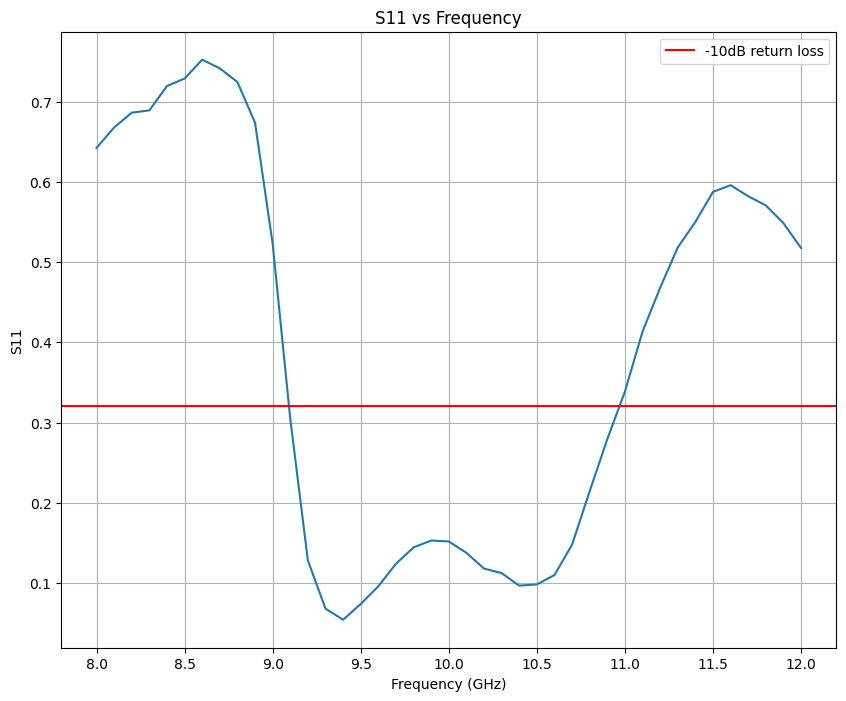

In [ ]:
best_params_normalized = normalize_input([best_solution], X_array)
s11_values_best = model.predict(best_params_normalized)[0]
frequencies = np.linspace(8, 12, num=41)
plt.figure(figsize=(10, 8))
plt.plot(frequencies, s11_values_best)
plt.xlabel('Frequency (GHz)')
plt.ylabel('S11')
plt.title('S11 vs Frequency')
plt.axhline(y=0.32, color='r', linestyle='-', label='-10dB return loss')

plt.legend()
plt.grid(True)
plt.show()
